<a href="https://www.kaggle.com/code/sot2542/it-is-corn-by-so?scriptVersionId=123412393" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Author
Sakdipat Ontoum

https://www.linkedin.com/in/sakdipat-ontoum-256bb0209/

# Introduction

![](https://media.istockphoto.com/photos/closeup-of-organic-yellow-corn-seed-or-maize-fullframe-background-picture-id1308275817)

Corn is one of the plants that produce high-quality feed at a reasonable cost. It has many appearances and is a significant factor that one may use in society for us as humans in terms of food that we eat as well as a source of feed for cattle. Sometimes, if we deeply analyze the structure of corn, especially corn seeds. There are many categories such as pure, broken, discolored, and silkcut, which people cannot be classified with the naked eye. Therefore, machine learning specialists are approached and charged with developing machine learning model that can distinguish between photos taken in those four categories.

# Objective

This aim is to create a model that can predict whether a photograph was shot in front of a corn seed correctly - a multiclass image classification challenge.

# Approach

This machine learning project is divided into two parts which are Model development and data mining. Model deployment and operationalization will not be discussed because this model will not be put to production until later.

The training dataset will be utilzed from [It's Corn (PogChamps #3)](https://www.kaggle.com/competitions/kaggle-pog-series-s01e03) competition. The train image, it is consist of png file around 14.3k files. 

Second, the training dataset has a pretty large size, a Fastai  will be utilized to tackle this task. The Fastai is deep a deep learning library that provides practitioners with high-level components that can rapidly and easily give state-of-the-art results in traditional deep learning domains, but they require specialized hardware to process the information, such as a Graphical Processing Unit (GPU) as well.


# Dataset

The datadet either training or testing set, will be e utilzed from [It's Corn (PogChamps #3)](https://www.kaggle.com/competitions/kaggle-pog-series-s01e03) competition. There is contain images of corn that can be classified in one of four catgories such as pure, broken, silkcut, and discolored. 

# Performance Measure

The model will be improved and tested for F1-score.



# 1. Configurations

## 1.1 Install and Imports Library

All the install library go here.

In [1]:
!pip install fastkaggle

In [2]:
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.5.26
    Uninstalling fastcore-1.5.26:
      Successfully uninstalled fastcore-1.5.26


In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import albumentations as A

from sklearn.metrics import classification_report, roc_curve, auc, f1_score
from fastai.vision.all import *
from fastkaggle import *
from pathlib import Path

# 1.2 Global Settings

There variables will be used across the project.


In [4]:
#Directories
corn_path = Path('../input/kaggle-pog-series-s01e03/corn')
train_csv = '../input/kaggle-pog-series-s01e03/corn/train.csv'
test_csv = '../input/kaggle-pog-series-s01e03/corn/test.csv'
train_image_path = "../input/kaggle-pog-series-s01e03/corn/train"
test_image_path = "../input/kaggle-pog-series-s01e03/corn/test"


#Image Settings
IMAGE_INPUT_SIZE = 132 
IMAGE_OUTPUT_SIZE=128
SCALE_RATE = 0.75
AMOUNT_IMAGE = 12
BATCH_SIZE = 64

#Training Settings
EPOCH = 20
DELTA_RATE = 0.1
PATIENCE_RATE = 3
FACTOR_RATE = 0.5
VAL_SIZE = 0.2


# 1.3 Data Image Importation

The data will be imported from [It's Corn (PogChamps #3)](https://www.kaggle.com/competitions/kaggle-pog-series-s01e03) competition. There is consist of training and testing image and csv file. Then, it is combine those image with csv file by using ImageDataLoaders on next step.

In [5]:
train_df = pd.read_csv(train_csv)
train_df.head()

,seed_id,view,image,label
0,0,top,train/00000.png,broken
1,1,bottom,train/00001.png,pure
2,3,top,train/00003.png,broken
3,4,top,train/00004.png,pure
4,5,top,train/00005.png,discolored


In [6]:
test_df = pd.read_csv(test_csv)
test_df.head()

,seed_id,view,image
0,2,top,test/00002.png
1,11,bottom,test/00011.png
2,13,top,test/00013.png
3,19,bottom,test/00019.png
4,27,bottom,test/00027.png


In [7]:
train_image_files = get_image_files(train_image_path) 
train_image_files

(#14322) [Path('../input/kaggle-pog-series-s01e03/corn/train/01301.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/14127.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/06781.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/11396.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/00929.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/14260.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/04915.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/07470.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/08216.png'),Path('../input/kaggle-pog-series-s01e03/corn/train/12329.png')...]

In [8]:
test_image_files = get_image_files(test_image_path).sorted()
test_image_files

(#3479) [Path('../input/kaggle-pog-series-s01e03/corn/test/00002.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00011.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00013.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00019.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00027.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00030.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00032.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00041.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00042.png'),Path('../input/kaggle-pog-series-s01e03/corn/test/00043.png')...]

# 2. Data Preprocessing

I handle image data preprocessing by using Albumentation. There is efficiently implements of image transformation anf augmentation.

In [9]:
def get_train_aug(): 
    return A.Compose([
    A.HueSaturationValue(
                hue_shift_limit=0.2, 
                sat_shift_limit=0.2, 
                val_shift_limit=0.2, 
                p=0.5
            ),
    A.CoarseDropout(p=0.5),
    A.RandomBrightnessContrast(p=1),    
    A.RandomGamma(p=1),    
    A.CLAHE(p=1), 
])

In [10]:
class AlbumentationsTransform(Transform):
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

For the ImageDataLoaders of train and test image, I defined batch size with 64, and split data into 80 % of training, and 20 % validation by itself.

In [11]:
train_image_data_loader = ImageDataLoaders.from_csv(corn_path, csv_fname='train.csv', fn_col=2, label_col=3, bs=BATCH_SIZE, shuffle=True,
                                                    item_tfms=[Resize(IMAGE_INPUT_SIZE,method='squish'), AlbumentationsTransform(get_train_aug())], 
                                                    valid_pct=VAL_SIZE,batch_tfms=aug_transforms(size=IMAGE_OUTPUT_SIZE, min_scale=SCALE_RATE))

test_image_data_loader = ImageDataLoaders.from_csv(corn_path, csv_fname='test.csv', fn_col=2, label_col=1, bs=BATCH_SIZE, shuffle=True,
                                                   item_tfms=[Resize(IMAGE_INPUT_SIZE,method='squish'), AlbumentationsTransform(get_train_aug())], 
                                                   valid_pct=VAL_SIZE, batch_tfms=aug_transforms(size=IMAGE_OUTPUT_SIZE, min_scale=SCALE_RATE))

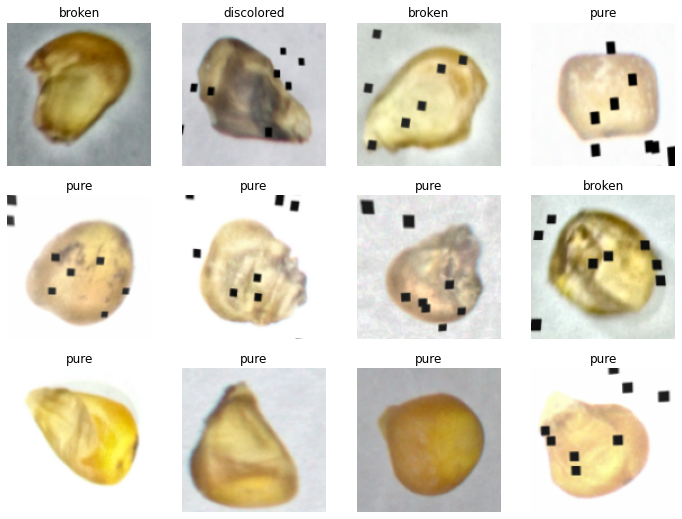

In [12]:
train_image_data_loader.show_batch(max_n=AMOUNT_IMAGE)

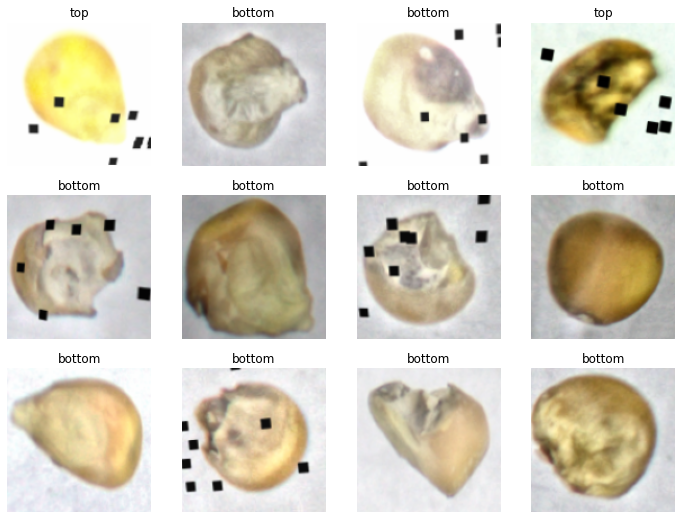

In [13]:
test_image_data_loader.show_batch(max_n=AMOUNT_IMAGE)

# 3. Model Creation

## 3.1 Training

![](https://miro.medium.com/max/1400/0*tH9evuOFqk8F41FG.png)

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-28_at_12.59.56_PM_1D7lrVF.png)

I utilized the vision learner from FastAI with restnet50 as a pretrained model. Then, I added three metrics Accuracy, Recall, Precision, and F1-score (F-Measure). Since I don't that how much to use EPOCH is suitable for this task, it also added an early stopping callback by monitoring valid_loss with min delta rate, and patience rate.

In [14]:
run_this = True

if run_this:
    corn_learn = vision_learner(train_image_data_loader, 
                            models.resnet50, 
                            metrics=[accuracy, Recall(average='weighted'), 
                                     Precision(average='weighted'),
                                     F1Score(average='weighted')],
                            model_dir='/tmp/model/')
    corn_learn.fine_tune(EPOCH, cbs=[EarlyStoppingCallback(monitor='valid_loss', min_delta=DELTA_RATE, patience=PATIENCE_RATE)])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,f1_score,time
0,1.483857,1.074082,0.585545,0.585545,0.572969,0.575465,01:21


epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,f1_score,time
0,1.055914,0.886967,0.645950,0.645950,0.637028,0.631959,01:10
1,0.933664,0.821741,0.680168,0.680168,0.677473,0.667580,01:10
2,0.824326,0.749445,0.700070,0.700070,0.696346,0.691183,01:09
3,0.725984,0.755068,0.712640,0.712640,0.710795,0.706844,01:10
4,0.686523,0.711724,0.726606,0.726606,0.729861,0.715654,01:09
5,0.656991,0.657811,0.743017,0.743017,0.743169,0.735016,01:09


No improvement since epoch 2: early stopping


In [15]:
corn_learn.save('corn-seed-model-10012022-1')

Path('/tmp/model/corn-seed-model-10012022-1.pth')

In [16]:
corn_learn.load('corn-seed-model-10012022-1');


SuggestedLRs(valley=7.585775892948732e-05, slide=0.0020892962347716093)

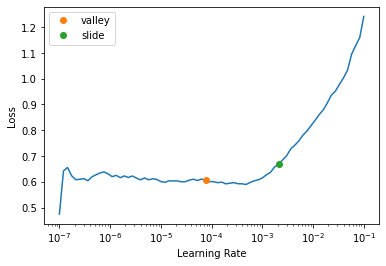

In [17]:
corn_learn.lr_find(suggest_funcs=(valley, slide))

# 4. Evaluation 

## 4.1 Import of sample summission

In [18]:
submission = pd.read_csv('../input/kaggle-pog-series-s01e03/corn/sample_submission.csv')
submission = submission['seed_id']
submission

0        8632
1       11394
2       17362
3        9987
4       17226
        ...  
3474     1461
3475     2566
3476    11504
3477     5140
3478     6025
Name: seed_id, Length: 3479, dtype: int64

## 4.2 Confusion Matrix

In [19]:
interpret = ClassificationInterpretation.from_learner(corn_learn)

As below here, it is confusion matrix between training and validation set

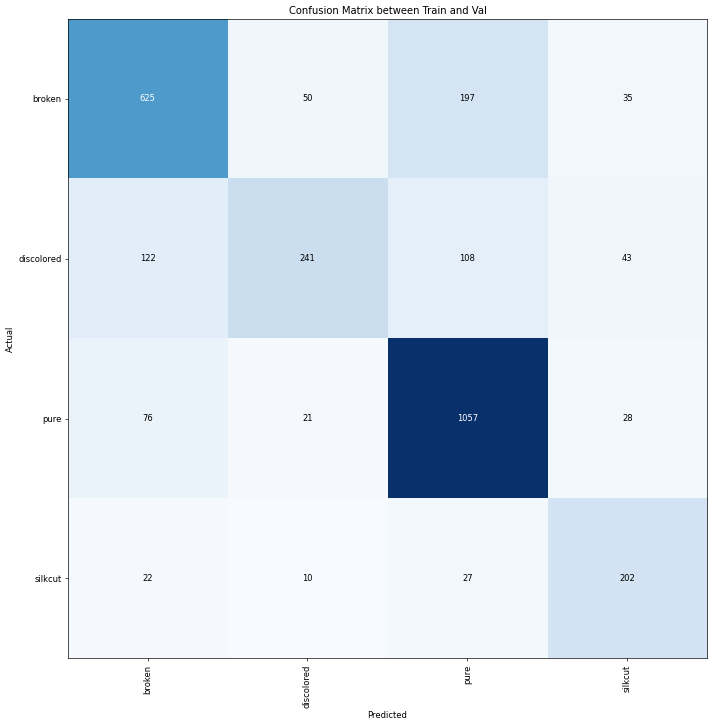

In [20]:
interpret.plot_confusion_matrix(title="Confusion Matrix between Train and Val",figsize=(12,12), dpi=60)


In [21]:
interpret.most_confused(min_val=4)

[('broken', 'pure', 188),
 ('discolored', 'broken', 124),
 ('discolored', 'pure', 110),
 ('pure', 'broken', 73),
 ('broken', 'discolored', 54),
 ('discolored', 'silkcut', 40),
 ('broken', 'silkcut', 33),
 ('pure', 'silkcut', 30),
 ('silkcut', 'broken', 29),
 ('pure', 'discolored', 27),
 ('silkcut', 'pure', 26),
 ('silkcut', 'discolored', 10)]

In [22]:
losses,idxs = interpret.top_losses()

len(train_image_data_loader.valid_ds)==len(losses)==len(idxs)

True

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


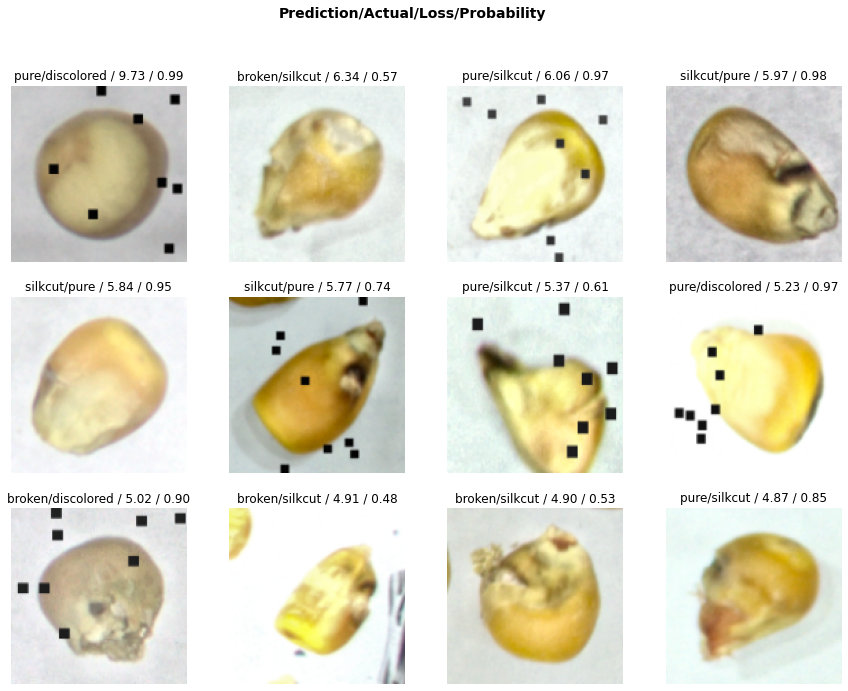

In [23]:
interpret.plot_top_losses(12, figsize=(15,11))

From my observation, the corn seed of pure, broken, and discolored could make the model most confused since they quite have a similar image. 

## 4.3 Classification Report

In [24]:
predicts, y_actual = corn_learn.get_preds()
predicts.shape, y_actual.shape

(torch.Size([2864, 4]), torch.Size([2864]))

In [25]:
y_actual = y_actual.numpy()
predicts = np.argmax(predicts.numpy(), axis=-1)
predicts.shape, y_actual.shape

((2864,), (2864,))

It is classification report between training and validation set 

In [26]:
classes = list(train_image_data_loader.vocab)
report = classification_report(y_actual, predicts, target_names=classes)
f_measure_score = f1_score(y_actual, predicts, average='weighted')
print(report)
print('F-measure: {:.4f}'.format(f_measure_score))


              precision    recall  f1-score   support

      broken       0.75      0.69      0.72       907
  discolored       0.74      0.46      0.57       514
        pure       0.76      0.91      0.83      1182
     silkcut       0.66      0.77      0.71       261

    accuracy                           0.75      2864
   macro avg       0.73      0.71      0.71      2864
weighted avg       0.75      0.75      0.74      2864

F-measure: 0.7371


## 4.4 Preparation of Submission

In [27]:
test_data_list = train_image_data_loader.test_dl(test_image_files)

In [28]:
prob,_,idxs = corn_learn.get_preds(dl=test_data_list, with_decoded=True)

idxs

TensorBase([2, 2, 2,  ..., 2, 2, 2])

In [29]:
mapping = dict(enumerate(train_image_data_loader.vocab))
test_results = pd.Series(idxs.numpy(), name='idxs').map(mapping)
test_df['label'] = test_results
test_df

,seed_id,view,image,label
0,2,top,test/00002.png,pure
1,11,bottom,test/00011.png,pure
2,13,top,test/00013.png,pure
3,19,bottom,test/00019.png,silkcut
4,27,bottom,test/00027.png,broken
...,...,...,...,...
3474,17775,bottom,test/17775.png,discolored
3475,17781,bottom,test/17781.png,broken
3476,17790,bottom,test/17790.png,pure
3477,17794,bottom,test/17794.png,pure


In [30]:
submission = pd.merge(submission, test_df, on='seed_id')
submission

,seed_id,view,image,label
0,8632,bottom,test/08632.png,broken
1,11394,bottom,test/11394.png,broken
2,17362,bottom,test/17362.png,broken
3,9987,top,test/09987.png,broken
4,17226,top,test/17226.png,pure
...,...,...,...,...
3474,1461,top,test/01461.png,silkcut
3475,2566,top,test/02566.png,silkcut
3476,11504,top,test/11504.png,silkcut
3477,5140,bottom,test/05140.png,broken


In [31]:
submission = submission[['seed_id', 'label']]
submission

,seed_id,label
0,8632,broken
1,11394,broken
2,17362,broken
3,9987,broken
4,17226,pure
...,...,...
3474,1461,silkcut
3475,2566,silkcut
3476,11504,silkcut
3477,5140,broken


In [32]:
submission.to_csv('submission-10012022-8.csv', index=False)

# 5. Analysis

The model performs moderately performance since it has an F-measure score of around 0.7061 (70.61%). I feel this model should be a bit fine tune and handled with data preprocessing.

# 6. Conclusion

In this [It's Corn (PogChamps #3)](https://www.kaggle.com/competitions/kaggle-pog-series-s01e03) competition,  I created a machine learning model that can moderately classify photographs of a kind of corn seed. I used transfer learning using Restnet50 that was pre-trained with imagenet. In the validation set, the model has an F-measure of 70.61 percent. Therefore, the model is maybe wrong to predict images for some time. Especially with pure, broken, and discolored.

Anyway, if you have any suggestions about my notebook. Please do leave your comment on the tab 😊😊.

# Reference
https://www.kaggle.com/code/terpsmeta/quick-start-eda-to-model-sub

https://www.kaggle.com/code/jhoward/first-steps-road-to-the-top-part-1

https://www.kaggle.com/code/kurianbenoy/fastai-baseline-albumentations

https://github.com/fastai/fastai

https://www.kaggle.com/code/nghihuynh/training-it-s-corn-cnn-fastai-baseline/notebook#7.-Training

https://towardsdatascience.com/the-annotated-resnet-50-a6c536034758

https://paperswithcode.com/method/early-stopping

# Thank you 😆😆
![](https://i.ytimg.com/vi/_caMQpiwiaU/maxresdefault.jpg)